# **Análise de Comportamento de Compra de Consumidores do E-commerce Brasileiro**
----

## **Introdução**

### Objetivo
A finalidade desta análise é examinar os dados dos consumidores do E-commerce brasileiro Olist, com o intuito de identificar os padrões de comportamento de compra e responder a diversas questões relacionadas ao negócio. Para alcançar esse objetivo, serão utilizadas diversas técnicas de análise de dados, incluindo a segmentação de clientes e análise de associação.


### Perguntas de Negócio
Está análise se propõe a responder as seguintes demandas:
* Quais são os produtos mais vendidos?
* Quais são os produtos que são geralmente comprados juntos?
* Qual é o valor médio de cada compra?
* Quais são os clientes mais valiosos?
* Qual é a taxa de recompra dos clientes?
* Quais são as preferências de compra dos clientes?
* Como as vendas variam ao longo do tempo?
* Como as vendas variam de acordo com a localização geográfica?
* Como o preço afeta o comportamento de compra dos clientes?
* Quais são as tendências de compra ao longo do tempo?

## Bibliotecas e Definições

Lista de todas as bibliotecas utilizadas, padronização de recursos e definições de funções.

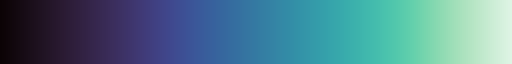

In [23]:
import pandas as pd
import numpy as np
# inline mostrara um gráfico estática na tela
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns
sns.set_theme(style="ticks", palette="mako")#registrando tema
sns.color_palette("mako", as_cmap=True)

## Etapa I - ETL - Extract, Transform and Load

Etapa de aplicação de técnicas de ETL (Extração, Transformação e Carregamento) onde vamos carregar os datasets de interesse, realizar limpezas e transformações necessárias

### Coleta dos Dados
Carregamento individual dos datasets e visualização da amostra

In [2]:
# Carregando dados dos Clientes
df_clientes = pd.read_csv('dados/olist_customers_dataset.csv', sep=',')
df_clientes.sample(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
78626,fedad553036c744cca336c2ed0722e3c,b8ad9cbd6c6a50ec05e51737a48eed62,26140,belford roxo,RJ
42742,326bd99b43665ac9e198d45b189740b5,9c18cd0ba86443dce5c2e5157cbd2eff,88032,florianopolis,SC
49572,09ab2c2de0ecac3c7cca42e6a9dea0c1,cd694ea528e48cabceeded7137cca7b2,95185,carlos barbosa,RS


In [3]:
# Carregando dados dos Pedidos
# utilizado argumento parse_dates para garantir que todas as colunas de datas estejam com o tipo datetime
df_pedidos = pd.read_csv('dados/olist_orders_dataset.csv', sep=',', parse_dates=['order_purchase_timestamp','order_approved_at', \
                                                                                 'order_delivered_carrier_date', 'order_delivered_customer_date', \
                                                                                 'order_estimated_delivery_date'])
df_pedidos.sample(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
26129,ebbc16c6955354160e1dfd2cd3b4430f,610f0574fe58619864503689b50d2819,delivered,2017-05-27 23:09:15,2017-05-27 23:22:16,2017-05-31 07:27:01,2017-06-24 10:51:06,2017-07-03
23074,97a8e78c9b29af3ed3a454d82a5ed310,0d91c0772ebbeeb7940a79c886b29a3a,delivered,2018-04-25 13:10:00,2018-04-25 13:30:59,2018-04-26 12:55:00,2018-05-03 00:12:48,2018-05-29
52509,f0a3e1364c48c7c7f24a2282883d5c64,1e0a457fc59c18e16237e1fe1621d66c,delivered,2018-05-03 08:42:45,2018-05-03 09:12:19,2018-05-07 14:42:00,2018-05-11 23:05:09,2018-05-15


In [4]:
# Carregandos dados dos Itens dos Pedidos
# utilizado argumento parse_dates para garantir que todas as colunas de datas estejam com o tipo datetime
df_itens_pedidos = pd.read_csv('dados/olist_order_items_dataset.csv', sep=',', parse_dates=['shipping_limit_date'])
df_itens_pedidos.sample(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
40940,5d3f17189564c02461ad6f05854bb5a3,1,d75a0171edd3ca57da180fea05c00485,7142540dd4c91e2237acb7e911c4eba2,2017-08-07 18:05:18,59.90,13.44
4531,0a36bd172604d49ae57f2ae440a0dc70,1,52ae46963f0cd4c1497fe26a0f50fa6f,c8b0e2b0a7095e5d8219575d5e7e1181,2018-07-31 20:50:08,199.99,28.35
33550,4bfe0bd0ac2d566a6ab7c45961288b60,1,1c973679d17e2e7505000add215699f6,7aa4334be125fcdd2ba64b3180029f14,2017-12-07 15:09:59,106.99,122.54


In [5]:
# Carregandos dados de Geolocalização
df_geo = pd.read_csv('dados/olist_geolocation_dataset.csv', sep=',')
df_geo.sample(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
439332,22041,-22.965344,-43.192708,rio de janeiro,RJ
192164,7700,-23.366602,-46.740015,caieiras,SP
891764,86990,-23.486716,-51.786684,marialva,PR


In [6]:
# Carregando dados de Resenhas 
# utilizado argumento parse_dates para garantir que todas as colunas de datas estejam com o tipo datetime

df_resenhas = pd.read_csv('dados/olist_order_reviews_dataset.csv', sep=',',
                          parse_dates=['review_creation_date','review_answer_timestamp'] )
df_resenhas.sample(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
59441,e2947f0f8cd53b87cbec23f8f6bee362,26887eda6470e8f186f3155b2b3116c8,5,Ótimo,Ótimo,2018-08-23,2018-08-24 03:56:57
33794,94abbbadab9394e9a9e2bb89855c3dc3,e3f50e1c357268aa977efcfc6043c79d,5,NaN,NaN,2017-11-20,2017-11-24 01:17:04
74526,4ebc298a393e45e9622da046dc3e43c7,0ec61157a488963fe217233f74c52760,4,NaN,NaN,2016-11-01,2016-11-07 15:02:44


In [7]:
# Carregando dados de Pagamento dos Pedidos
df_pagamentos = pd.read_csv('dados/olist_order_payments_dataset.csv', sep=',')
df_pagamentos.sample(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
77615,e6d97bc4704949a17341d5c9aa85a050,1,credit_card,1,48.90
92665,7d5ba597429574dce3200b4b20686641,2,voucher,1,61.17
38965,5f358d797a49fe2f24352f73426215f6,1,credit_card,2,77.61


In [8]:
# Carregando os dados dos Produtos
df_produtos = pd.read_csv('dados/olist_products_dataset.csv', sep=',')
df_produtos.sample(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1810,8fbd36d3b045f5f38b252b1513478f38,informatica_acessorios,56.0,482.0,2.0,500.0,35.0,5.0,15.0
23013,704e67b8c7ce855d8760c074b4530fb5,relogios_presentes,40.0,651.0,3.0,500.0,23.0,15.0,19.0
4891,1276de9d6e6200f71cfb172a76abf703,fashion_bolsas_e_acessorios,43.0,250.0,2.0,50.0,16.0,5.0,16.0


In [9]:
# Carregando dados dos vendedores
df_vendedor = pd.read_csv('dados/olist_sellers_dataset.csv', sep=',')
df_vendedor.sample(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2013,11bfa66332777660bd0640ee84d47006,14085,ribeirao preto,SP
1055,fdb9095204a334cd8872252ffec6f2db,3331,sao paulo,SP
832,ff4ea69c2a729e83e63c7579e4ef8170,7071,guarulhos,SP


In [10]:
# Carregando dados de tradução das categorias dos produtos
df_categoria_port = pd.read_csv('dados/product_category_name_translation.csv', sep=',')
df_categoria_port.sample(3)

,product_category_name,product_category_name_english
40,casa_construcao,home_construction
19,consoles_games,consoles_games
36,construcao_ferramentas_ferramentas,costruction_tools_tools


### Limpeza e Transformação dos Dados
Antes de iniciar a análise é preciso preparar os dados e garantir a qualidade deles, para isso são aplicadas técnicas de limpeza e transformação dos dados, onde são identificados e tratados os valores faltantes, outliers, duplicados e valores inconsistentes ou inválidos. Além de realizar junções, agrupamentos, criar campos calculados, entre outras transformações identificadas como necessárias.

#### Juntando datasets

Como se tratam de 09 datasets diferentes, vamos juntá-los para que possamos trabalhar com uma única base de dados para as nossas diferenes análises.

Seguiremos realizando Joins a partir da tabela fato<br>
**Esquema dos dados:**
![](https://i.imgur.com/HRhd2Y0.png)

In [11]:
# Juntando todas as bases de dados ref ao pedido
df_resultado = pd.merge(df_pedidos, df_itens_pedidos, how='left', on='order_id')
df_resultado = pd.merge(df_resultado, df_pagamentos, how='left', on='order_id')
df_resultado = pd.merge(df_resultado, df_resenhas, how='left', on='order_id')

In [12]:
# Juntando todas as bases de dados ref aos clientes
df_resultado = pd.merge(df_resultado, df_clientes, how='left', on='customer_id')

In [13]:
# Juntando todas as bases de dados ref aos produtos
df_resultado = pd.merge(df_resultado, df_produtos, how='left', on='product_id')

In [14]:
# Juntando todas as bases de dados ref aos vendedores
df_resultado = pd.merge(df_resultado, df_vendedor, how='left', on='seller_id')

In [15]:
# Salvando o dataframe como arquivo CSV separado por vírgula
df_resultado.to_csv('dados/df_unificado.csv', sep=',', index=False)

Deixamos de fora os dados de geolocalizaçãom que conforme necessidade poderão ou não ser anexados

In [16]:
# Informações dos datasets

df_resultado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id                      118310 non-null  object        
 11  

#### Tratamento de tipo de dados

Na etapa anterior fora percebido que alguns tipos de dados não estavam adequados para a finalidade deste projeto, como a o atributo `customer_zip_code_prefix` da tabela de `clientes`estar com o tipo int64, como não pretendemos fazer nenhum cálculo, podemos converte-la ao tipo `object`.

In [17]:
# Convertendo todas as colunas que não realizaremos cálculo do tipo int64 para object.
# Vale ressaltar que poderiamos definir uma função para aplicar essas alteração, mas para fins didáticos e explicativos, 
# optamos por não fazê-lo
df_resultado.order_item_id = df_resultado.order_item_id.astype('object')
df_resultado.payment_sequential = df_resultado.payment_sequential.astype('object')
df_resultado.customer_zip_code_prefix = df_resultado.customer_zip_code_prefix.astype('object')
df_resultado.seller_zip_code_prefix = df_resultado.seller_zip_code_prefix.astype('object')

#### Valores em duplicidade

Verificando se há valores para serem tratados.

In [18]:
# Verificando se há dados duplicados

if df_resultado.duplicated().sum()  == 0:
    print("Não há dados duplicados")
else:
    print("Existem dados duplicados a serem tratados")

Não há dados duplicados


## Etapa II - EDA - Exploratory Data Analysis

Ou como é conhecida em português: Análise Exploratória dos Dados. É uma etapa importante em projetos de análise de dados. O objetivo é obter informações úteis e relevantes sobre o conjunto de dados através de técnicas de estatística descritiva e visualização de gráficos. Isso ajuda a identificar padrões, tendências, valores extremos e outros aspectos importantes que podem ser usados para direcionar outras etapas da análise. É importante realizar essa etapa com calma e explorando todas as possibilidades.

### Entendendo os datasets
Utilizando técnicas de visualizações e resumos estátisticos para entender os dados e as variáveis do dataset unificado

In [19]:
# Resumo estatístistico - Clientes
# incluindo todas as colunas
# tratando dodos de data como numéricos

df_resultado.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
order_id,119143,99441,895ab968e7bb0d5659d16cd74cd1650c,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,119143,99441,270c23a11d024a44c896d1894b261a83,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,119143,8,delivered,115723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,119143,NaN,NaN,NaN,2017-12-29 18:36:13.115760128,2016-09-04 21:15:19,2017-09-10 20:15:46,2018-01-17 11:59:12,2018-05-03 13:18:30,2018-10-17 17:30:18,NaN
order_approved_at,118966,NaN,NaN,NaN,2017-12-30 04:49:18.425726976,2016-09-15 12:16:38,2017-09-11 15:50:48.500000,2018-01-17 16:49:49,2018-05-03 16:56:53,2018-09-03 17:40:06,NaN
order_delivered_carrier_date,117057,NaN,NaN,NaN,2018-01-03 08:24:34.395524864,2016-10-08 10:34:01,2017-09-14 19:52:12,2018-01-23 17:03:08,2018-05-07 14:57:00,2018-09-11 19:48:28,NaN
order_delivered_customer_date,115722,NaN,NaN,NaN,2018-01-12 20:55:38.199616,2016-10-11 13:46:32,2017-09-22 21:54:31.249999872,2018-02-01 03:17:55,2018-05-15 00:08:31.500000,2018-10-17 13:22:46,NaN
order_estimated_delivery_date,119143,NaN,NaN,NaN,2018-01-22 15:21:10.241642240,2016-09-30 00:00:00,2017-10-02 00:00:00,2018-02-14 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00,NaN
order_item_id,118310.0,21.0,1.0,103645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,118310,32951,aca2eb7d00ea1a7b8ebd4e68314663af,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualização da distribuição dos dados Numéricos

In [25]:
# Separando em um dataframe apenas as variáveis numéricas
df_var_numericas = df_resultado.select_dtypes(include=['int64', 'float64'])

Index(['price', 'freight_value', 'payment_installments', 'payment_value',
       'review_score', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],
      dtype='object')

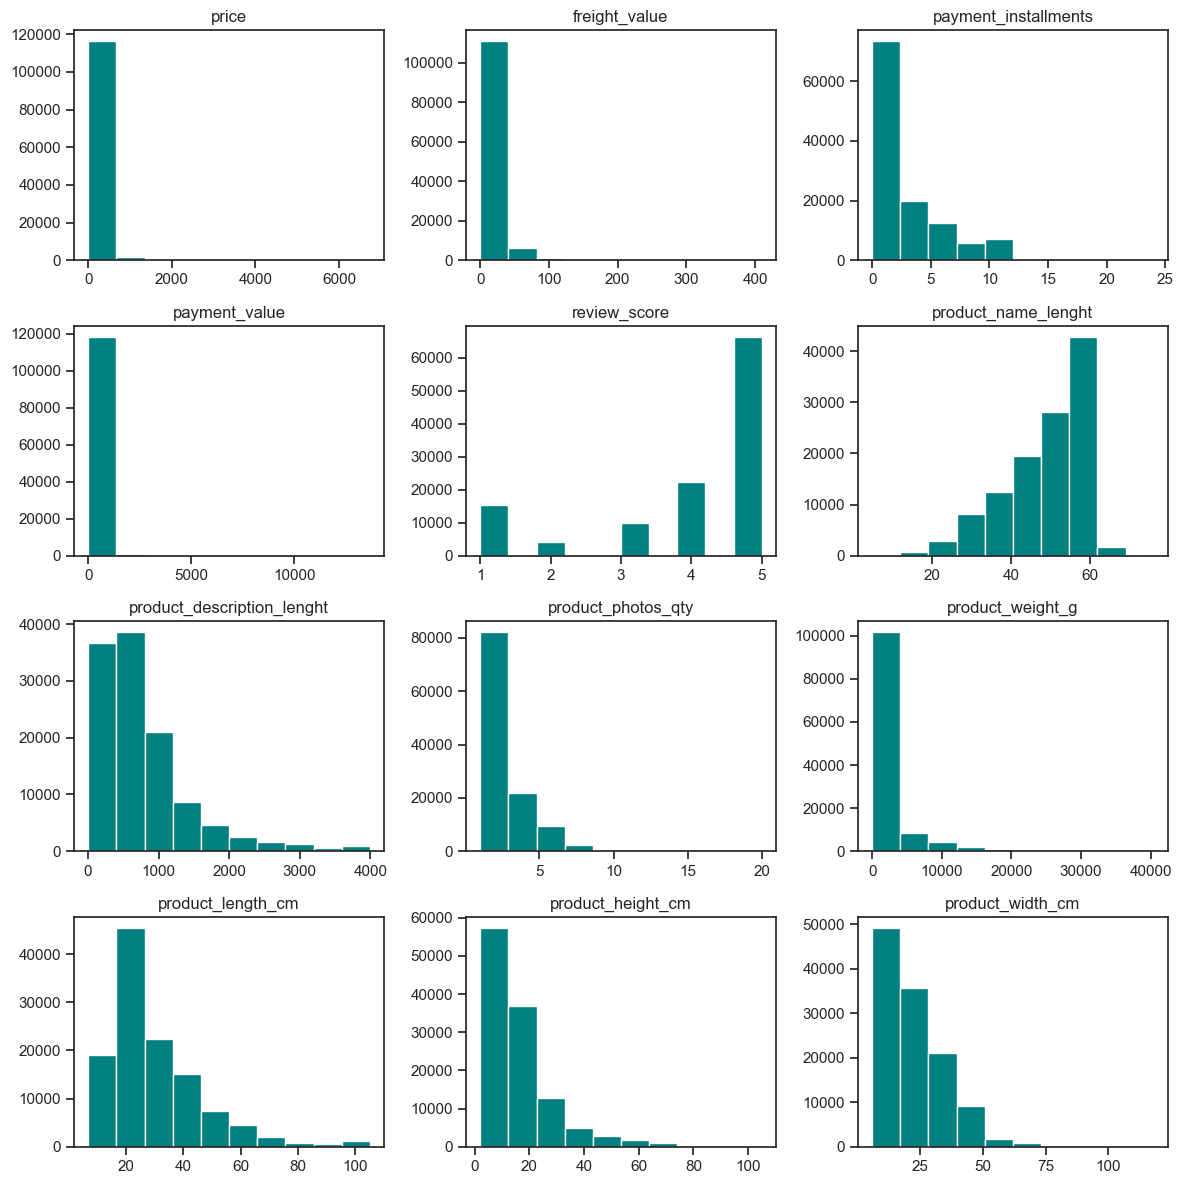

In [28]:
# Configura a figura com vários gráficos
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Itera sobre as colunas do dataframe df_var_numericas e plota o histograma correspondente 
# em uma posição específica da figura
for ax, column in zip(axes.flatten(), df_var_numericas.columns):
    ax.hist(df_var_numericas[column], bins=10, color='#008080')
    ax.set_title(column, fontsize=12)

plt.tight_layout()
plt.show()

### Analisando correlação

Usaremos a técnica estatística de análise de correlação para identificar e avaliar as relações entre as variáveis. Ela nos permitirá identicar se as variáveis estão se relacionando entre si, e em qual grau. Para isso observamos o Coeficiente de Correção.

#### Correlação de Variáveis do tipo Numéricas

**Método Utilizado:** Correlação de Spearman<br>
A correlação de Spearman é uma medida estatística que avalia o relacionamento entre **duas variáveis ordinais ou intervalares** sem assumir uma distribuição particular. O coeficiente varia entre -1 e 1, indicando correlação negativa perfeita, nenhuma correlação ou correlação positiva perfeita. O cálculo envolve classificar as observações em ordem e calcular a correlação de Pearson entre as classificações. É útil quando as variáveis não seguem uma distribuição normal ou têm outliers. No entanto, correlação não implica causalidade e outros fatores devem ser avaliados para entender a relação entre as variáveis.

In [33]:
# Separando em um dataframe apenas as variáveis numéricas
df_var_numericas = df_resultado.select_dtypes(include=['int64', 'float64', 'datetime64[ns]'])

In [34]:
# Criando uma matriz de correlação
corr_matrix = df_var_numericas.corr(method='spearman')

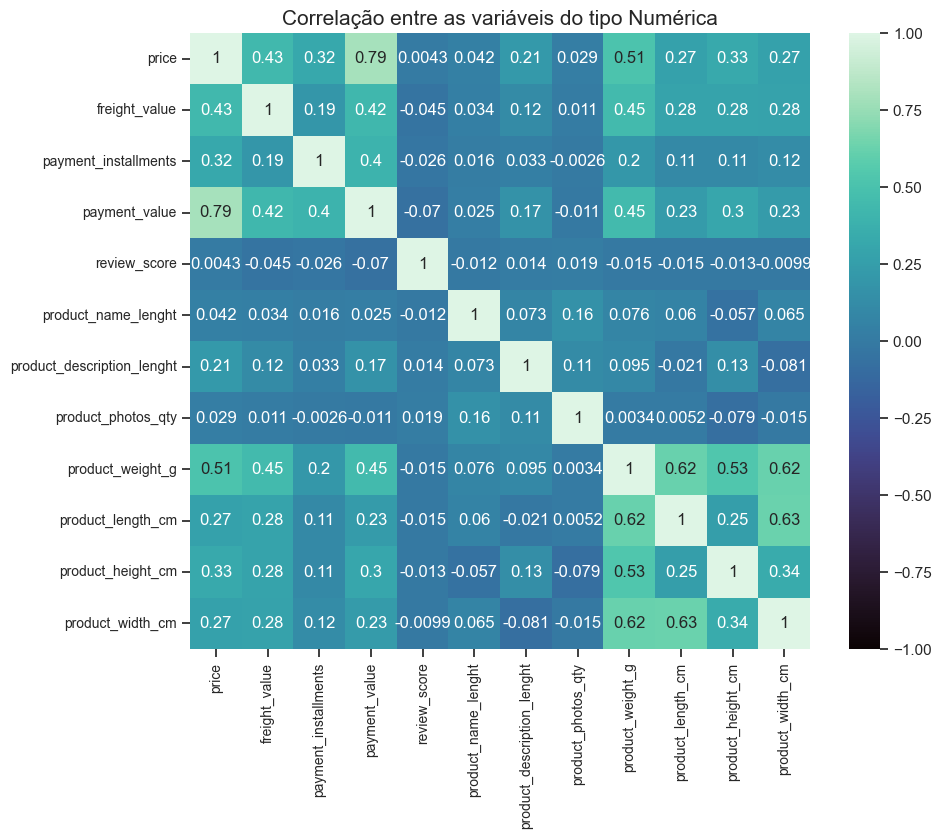

In [35]:
# Da biblioteca Seaborn utilizaremos para plotar um gráfico 

# Definindo o tamanho da figura
fig = plt.subplots(figsize=(10, 8))

# Plotando o gráfico
sns.heatmap(corr_matrix, annot=True, cmap='mako', vmin=-1, vmax=1)

# Define o título e as configurações de fonte
plt.title("Correlação entre as variáveis do tipo Numérica", fontdict={"fontsize": 15})

# Ajustar o tamanho da fonte da legenda
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Exibir o gráfico
plt.show()

Podemos notar um baixo número de variáveis com correlação negativa que não seja fraca. Já nas variáveis de correlação positiva, conseguimos identicar algumas que tem relação forte como entre `price` e `payment_value`. **Lembrando que correlação não implica eu causalidade!**

### Explorando dados de Pedidos
* Quantos categorias tem por pedido?
* Qual é o número de pedidos por estado?
* Qual tem sido o número de pedidos e receita ao longo do tempo?
* Qual é a distribuição do valor do pagamento?
* Qual o tipo de pagamento mais utilizado?
* Principais categorias por valor de pagamento e classificação de avaliação
* Quantos novos clientes existem todos os anos?

In [ ]:
# Define o tamanho da figura
plt.figure(figsize=(15, 15))

# Itera sobre as colunas do dataframe
for i, col in enumerate(df_var_numericas.columns):
    plt.subplot(9, 4, i+1)
    df[col].hist(bins=50)
    plt.title(col, fontsize=12)

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe o gráfico
plt.show()

## **Etapa III - Análise de Vendas**

## **Etapa IV - Análise de Clientes**

## **Etapa V - Análise geográfica e de preços**

## **Respostas Questionamentos**

## **Conclusão**

## **Referências**